In [8]:
! pip install ipywidgets


   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.2 MB ? eta -:--:--
   ---- --------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
! curl -L -o file.zip https://cleanlab-public.s3.amazonaws.com/CleanVision/image_files.zip

In [9]:
from cleanvision.imagelab import Imagelab
imageLab = Imagelab(data_path=r'E:\python\image_files\image_files')

Reading images from E:/python/image_files/image_files


In [11]:
imageLab.find_issues()

Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


100%|██████████| 607/607 [00:06<00:00, 87.68it/s] 

Issue checks completed. 205 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().


Issues found in images in order of severity in the dataset

|    | issue_type       |   num_images |
|---:|:-----------------|-------------:|
|  0 | odd_size         |          109 |
|  1 | near_duplicates  |           20 |
|  2 | grayscale        |           20 |
|  3 | exact_duplicates |           19 |
|  4 | odd_aspect_ratio |           11 |
|  5 | dark             |           10 |
|  6 | blurry           |            6 |
|  7 | low_information  |            5 |
|  8 | light            |            5 | 

--------------------- odd_size images ----------------------

Number of examples with this issue: 109
Examples representing most severe instances of this issue:



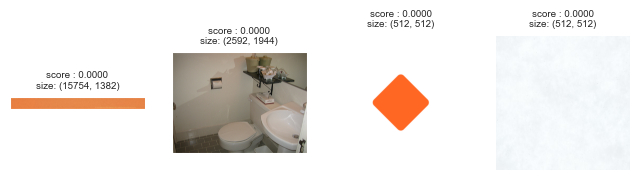

------------------ near_duplicates images ------------------

Number of examples with this issue: 20
Examples representing most severe instances of this issue:

Set: 0


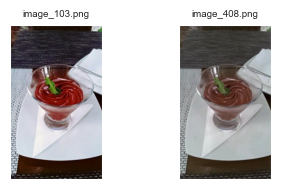

Set: 1


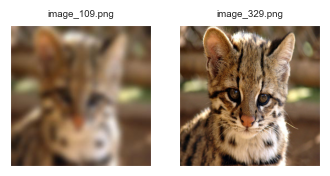

Set: 2


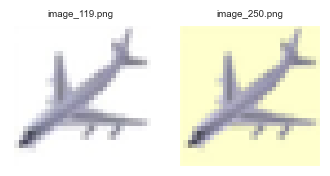

Set: 3


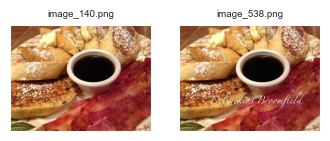

--------------------- grayscale images ---------------------

Number of examples with this issue: 20
Examples representing most severe instances of this issue:



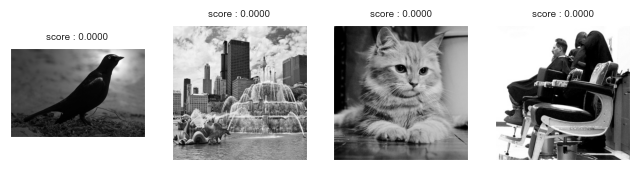

----------------- exact_duplicates images ------------------

Number of examples with this issue: 19
Examples representing most severe instances of this issue:

Set: 0


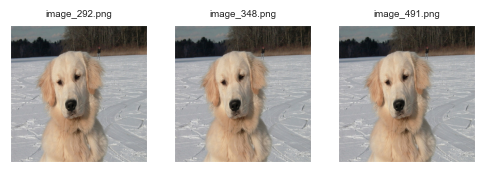

Set: 1


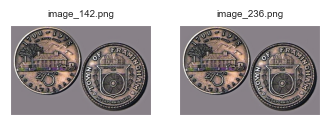

Set: 2


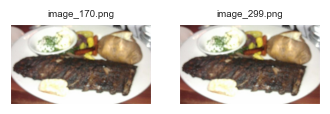

Set: 3


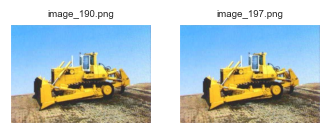

----------------- odd_aspect_ratio images ------------------

Number of examples with this issue: 11
Examples representing most severe instances of this issue:



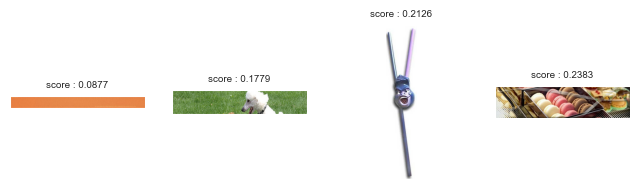

----------------------- dark images ------------------------

Number of examples with this issue: 10
Examples representing most severe instances of this issue:



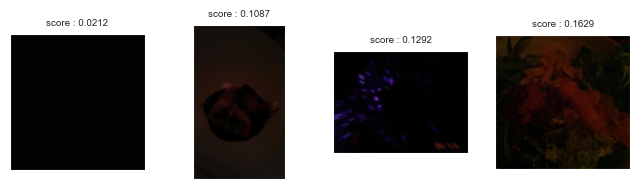

---------------------- blurry images -----------------------

Number of examples with this issue: 6
Examples representing most severe instances of this issue:



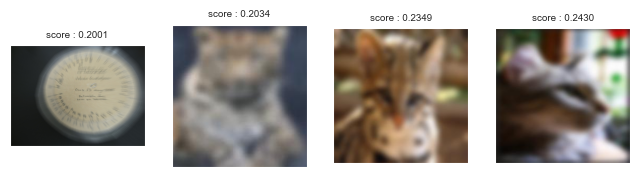

------------------ low_information images ------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



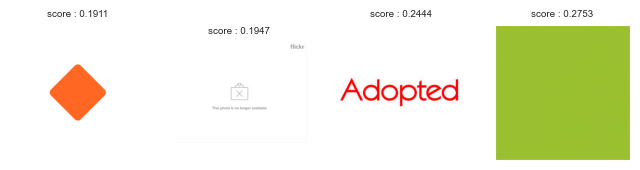

----------------------- light images -----------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



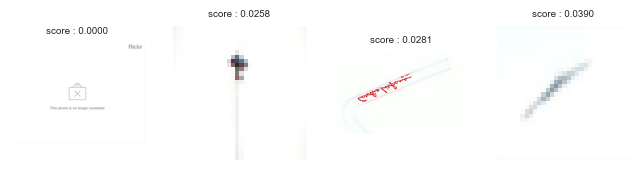

In [12]:
imageLab.report()

Checking for light, blurry images ...
Issue checks completed. 199 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
Issues found in images in order of severity in the dataset

|    | issue_type   |   num_images |
|---:|:-------------|-------------:|
|  7 | light        |            5 |
|  8 | blurry       |            0 | 

----------------------- light images -----------------------

Number of examples with this issue: 5
Examples representing most severe instances of this issue:



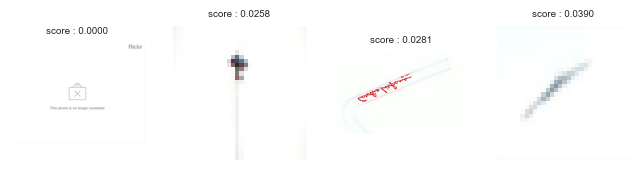

In [13]:
issue_types = {"light": {}, "blurry": {}}
imageLab.find_issues(issue_types=issue_types)
imageLab.report(issue_types=issue_types.keys())


In [14]:
issues = imageLab.issues
print(len(issues))

607


In [15]:
print(issues.head())

                                                 odd_size_score  \
E:/python/image_files/image_files/image_0.png               1.0   
E:/python/image_files/image_files/image_1.png               1.0   
E:/python/image_files/image_files/image_10.png              1.0   
E:/python/image_files/image_files/image_100.png             1.0   
E:/python/image_files/image_files/image_101.png             1.0   

                                                 is_odd_size_issue  \
E:/python/image_files/image_files/image_0.png                False   
E:/python/image_files/image_files/image_1.png                False   
E:/python/image_files/image_files/image_10.png               False   
E:/python/image_files/image_files/image_100.png              False   
E:/python/image_files/image_files/image_101.png              False   

                                                 odd_aspect_ratio_score  \
E:/python/image_files/image_files/image_0.png                       1.0   
E:/python/image_files/imag

In [24]:
import pandas as pd
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

In [17]:
issues_rows = issues[issues.filter(like="odd_size_score").any(axis=1)]

In [18]:
issues_rows

odd_size_score  \
E:/python/image_files/image_files/image_0.png               1.0   
E:/python/image_files/image_files/image_1.png               1.0   
E:/python/image_files/image_files/image_10.png              1.0   
E:/python/image_files/image_files/image_100.png             1.0   
E:/python/image_files/image_files/image_101.png             1.0   
...                                                         ...   
E:/python/image_files/image_files/image_95.png              1.0   
E:/python/image_files/image_files/image_96.png              1.0   
E:/python/image_files/image_files/image_97.png              1.0   
E:/python/image_files/image_files/image_98.png              1.0   
E:/python/image_files/image_files/image_99.png              1.0   

                                                 is_odd_size_issue  \
E:/python/image_files/image_files/image_0.png                False   
E:/python/image_files/image_files/image_1.png                False   
E:/python/image_files/image_files/image_10.png               False   
E:/python/image_files/image_files/image_100.png              False   
E:/python/image_files/image_files/image_101.png              False   
...                                                            ...   
E:/python/image_files/image_files/image_95.png               False   
E:/python/image_files/image_files/image_96.png               False   
E:/python/image_files/image_files/image_97.png               False   
E:/python/image_files/image_files/image_98.png               False   
E:/python/image_files/image_files/image_99.png               False   

                                                 odd_aspect_ratio_score  \
E:/python/image_files/image_files/image_0.png                       1.0   
E:/python/image_files/image_files/image_1.png                       1.0   
E:/python/image_files/image_files/image_10.png                      1.0   
E:/python/image_files/image_files/image_100.png                     1.0   
E:/python/image_files/image_files/image_101.png                     1.0   
...                                                                 ...   
E:/python/image_files/image_files/image_95.png                      1.0   
E:/python/image_files/image_files/image_96.png                      1.0   
E:/python/image_files/image_files/image_97.png                      1.0   
E:/python/image_files/image_files/image_98.png                      1.0   
E:/python/image_files/image_files/image_99.png                      1.0   

                                                 is_odd_aspect_ratio_issue  \
E:/python/image_files/image_files/image_0.png                        False   
E:/python/image_files/image_files/image_1.png                        False   
E:/python/image_files/image_files/image_10.png                       False   
E:/python/image_files/image_files/image_100.png                      False   
E:/python/image_files/image_files/image_101.png                      False   
...                                                                    ...   
E:/python/image_files/image_files/image_95.png                       False   
E:/python/image_files/image_files/image_96.png                       False   
E:/python/image_files/image_files/image_97.png                       False   
E:/python/image_files/image_files/image_98.png                       False   
E:/python/image_files/image_files/image_99.png                       False   

                                                 low_information_score  \
E:/python/image_files/image_files/image_0.png                 0.806332   
E:/python/image_files/image_files/image_1.png                 0.923116   
E:/python/image_files/image_files/image_10.png                0.875129   
E:/python/image_files/image_files/image_100.png               0.916140   
E:/python/image_files/image_files/image_101.png               0.779338   
...                                                                ...   
E:/python/image_files/image_files/image_95.png 

In [20]:
issue_files = issues_rows.index.tolist()

In [21]:
issue_files

['E:/python/image_files/image_files/image_0.png',
 'E:/python/image_files/image_files/image_1.png',
 'E:/python/image_files/image_files/image_10.png',
 'E:/python/image_files/image_files/image_100.png',
 'E:/python/image_files/image_files/image_101.png',
 'E:/python/image_files/image_files/image_102.png',
 'E:/python/image_files/image_files/image_103.png',
 'E:/python/image_files/image_files/image_104.png',
 'E:/python/image_files/image_files/image_105.png',
 'E:/python/image_files/image_files/image_106.png',
 'E:/python/image_files/image_files/image_107.png',
 'E:/python/image_files/image_files/image_108.png',
 'E:/python/image_files/image_files/image_109.png',
 'E:/python/image_files/image_files/image_11.png',
 'E:/python/image_files/image_files/image_110.png',
 'E:/python/image_files/image_files/image_111.png',
 'E:/python/image_files/image_files/image_112.png',
 'E:/python/image_files/image_files/image_113.png',
 'E:/python/image_files/image_files/image_114.png',
 'E:/python/image_

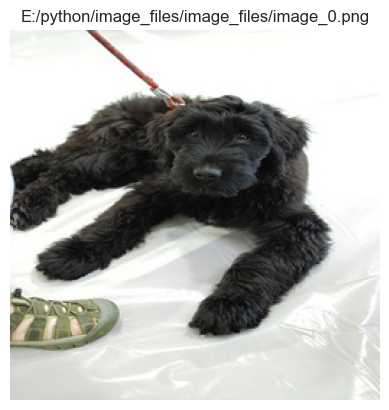

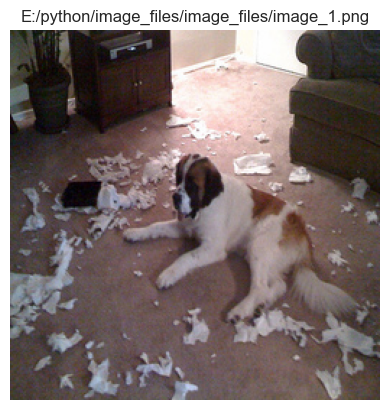

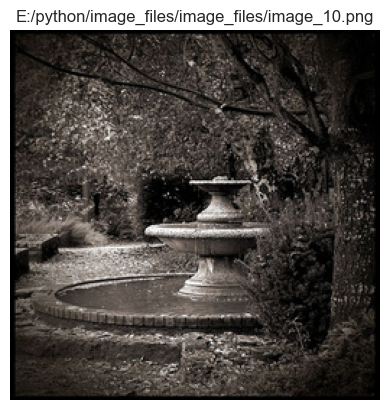

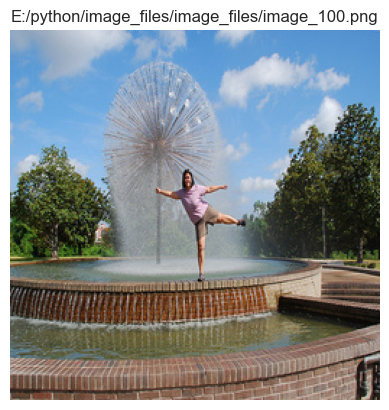

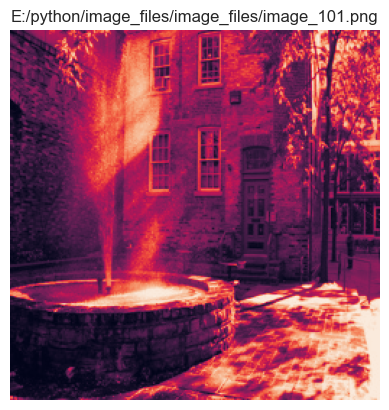

In [25]:
for path in issue_files[:5]:  # show first 5
    img = Image.open(path)
    plt.imshow(img)
    plt.title(path)
    plt.axis("off")
    plt.show()


In [29]:
for path, row in issues_rows.iterrows():
    issue_types = [col for col in row.index if col.startswith("is_") and row[col]]
    print(f"{path} -> Issues: {issue_types}")


E:/python/image_files/image_files/image_0.png -> Issues: []
E:/python/image_files/image_files/image_1.png -> Issues: []
E:/python/image_files/image_files/image_10.png -> Issues: []
E:/python/image_files/image_files/image_100.png -> Issues: []
E:/python/image_files/image_files/image_101.png -> Issues: ['is_grayscale_issue']
E:/python/image_files/image_files/image_102.png -> Issues: []
E:/python/image_files/image_files/image_103.png -> Issues: ['is_odd_size_issue', 'is_near_duplicates_issue']
E:/python/image_files/image_files/image_104.png -> Issues: ['is_odd_size_issue', 'is_grayscale_issue']
E:/python/image_files/image_files/image_105.png -> Issues: []
E:/python/image_files/image_files/image_106.png -> Issues: []
E:/python/image_files/image_files/image_107.png -> Issues: []
E:/python/image_files/image_files/image_108.png -> Issues: []
E:/python/image_files/image_files/image_109.png -> Issues: ['is_near_duplicates_issue']
E:/python/image_files/image_files/image_11.png -> Issues: []
E:/p

In [27]:
for path in issue_files:
    try:
        with Image.open(path) as img:
            print(f"{path} -> Size: {img.size}, Mode: {img.mode}")
    except Exception as e:
        print(f"Error opening {path}: {e}")


E:/python/image_files/image_files/image_0.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_1.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_10.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_100.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_101.png -> Size: (256, 256), Mode: L
E:/python/image_files/image_files/image_102.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_103.png -> Size: (307, 512), Mode: RGB
E:/python/image_files/image_files/image_104.png -> Size: (184, 300), Mode: L
E:/python/image_files/image_files/image_105.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_106.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_107.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_108.png -> Size: (256, 256), Mode: RGB
E:/python/image_files/image_files/image_109.png -> Size: (256

In [32]:
EXPECTED_SIZE = (256, 256)
EXPECTED_MODE = "RGB"
bad_img = []

In [33]:
for path in issue_files:
    try:
        with Image.open(path) as img:
            if img.mode != EXPECTED_MODE or img.size != EXPECTED_SIZE:
                bad_img.append(path)
    except Exception as e:
        print(f"Error opening {path}: {e}")

In [35]:
len(bad_img)

104

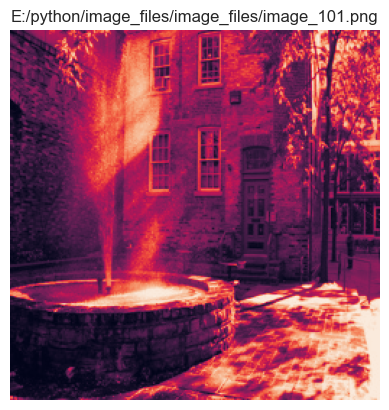

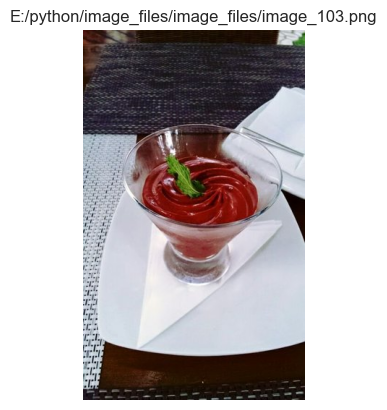

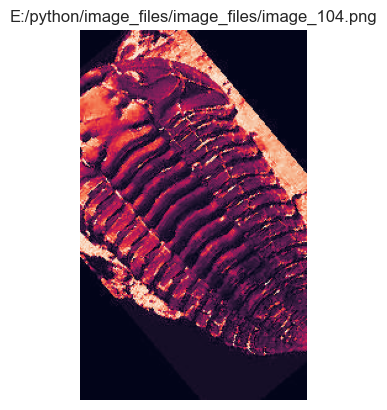

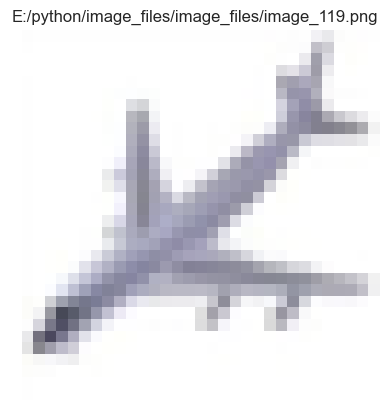

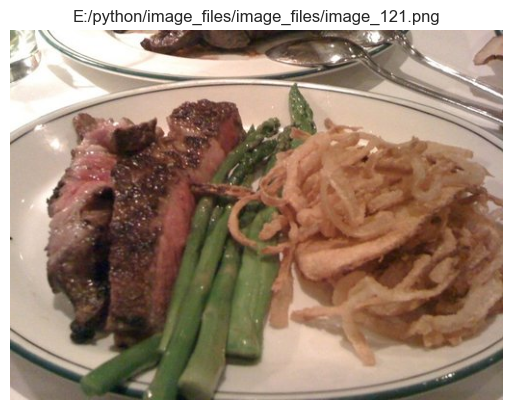

In [36]:
for path in bad_img[:5]:  # show first 5
    img = Image.open(path)
    plt.imshow(img)
    plt.title(path)
    plt.axis("off")
    plt.show()

In [39]:
for path in bad_img:
    try:
        with Image.open(path) as img:

            if img.mode != EXPECTED_MODE:
                img = img.convert(EXPECTED_MODE)

            if img.size != EXPECTED_SIZE:
                img = img.resize(EXPECTED_SIZE)

            img.save(path)
    except Exception as e:
        print(f"Error opening {path}: {e}")

E:/python/image_files/image_files/image_101.png -> Size: (256, 256), Mode: RGB


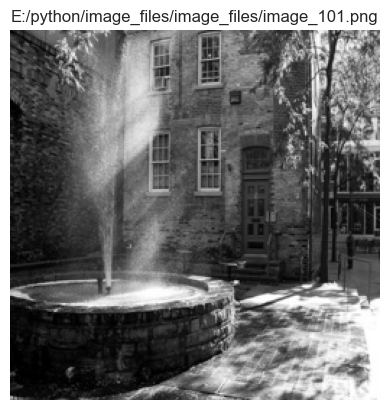

E:/python/image_files/image_files/image_103.png -> Size: (256, 256), Mode: RGB


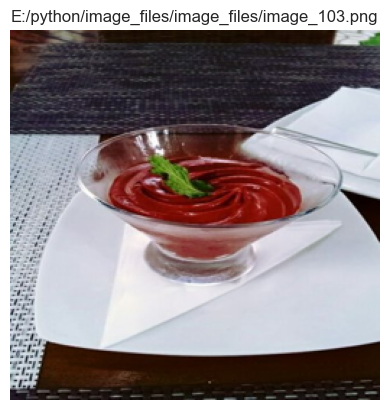

E:/python/image_files/image_files/image_104.png -> Size: (256, 256), Mode: RGB


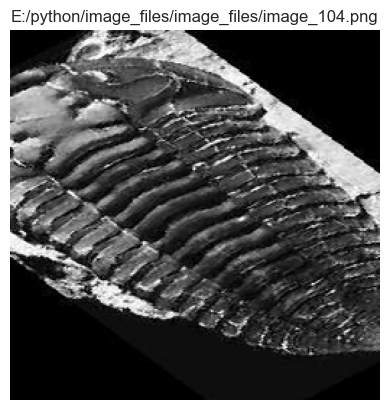

E:/python/image_files/image_files/image_119.png -> Size: (256, 256), Mode: RGB


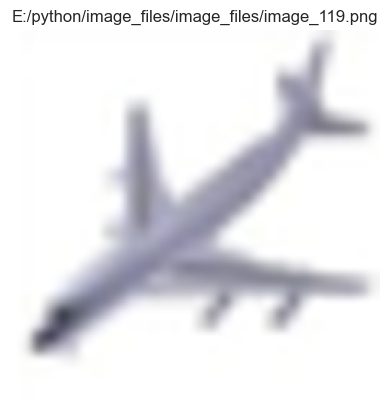

E:/python/image_files/image_files/image_121.png -> Size: (256, 256), Mode: RGB


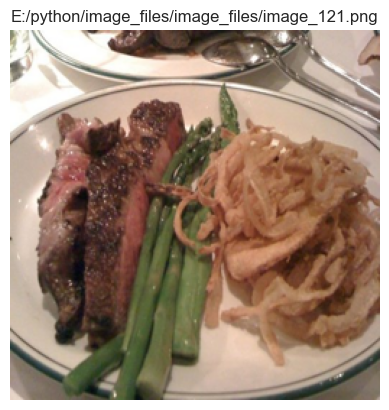

In [41]:
for path in bad_img[:5]:  # show first 5
    img = Image.open(path)
    print(f"{path} -> Size: {img.size}, Mode: {img.mode}")
    plt.imshow(img)
    plt.title(path)
    plt.axis("off")
    plt.show()

In [43]:
for path in issue_files:
    try:
        with Image.open(path) as img:
            if img.mode != EXPECTED_MODE or img.size != EXPECTED_SIZE:
                bad_img.append(path)
    except Exception as e:
        print(f"Error opening {path}: {e}")

In [44]:
len(bad_img)

104

In [45]:
blur_imgs = []

In [46]:
import cv2
for path in issue_files:
    try:
        cv_img = cv2.imread(path)
        gray = cv2.cvtColor(cv_img, cv2.COLOR_BGR2GRAY)
        lap_var = cv2.Laplacian(gray, cv2.CV_64F).var()

        if lap_var < 100:
            blur_imgs.append(path)
    except Exception as e:
        print(f"Error opening {path}: {e}")

In [48]:
len(blur_imgs)

41

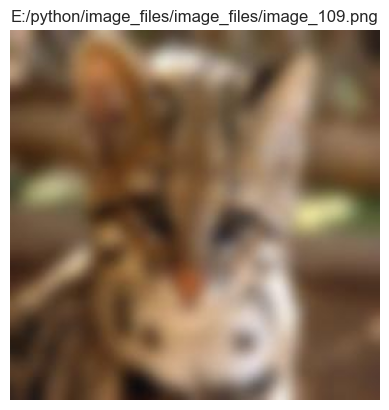

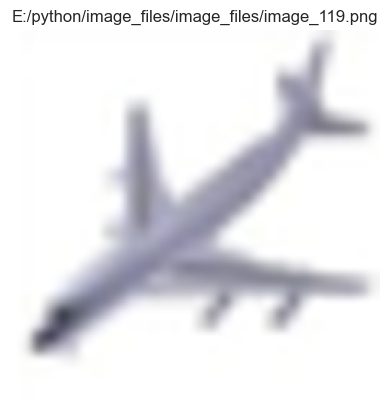

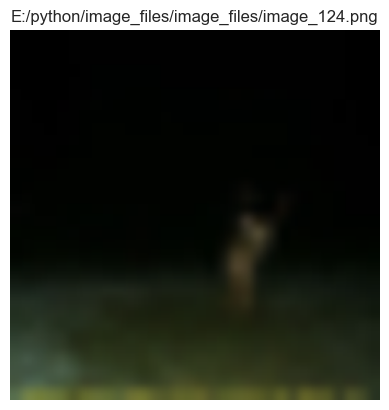

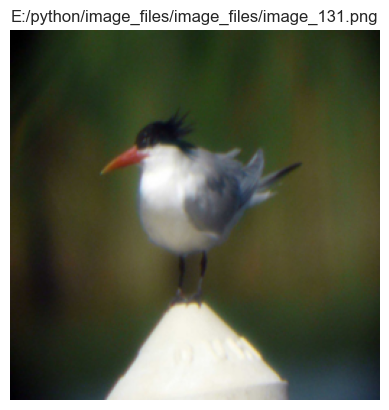

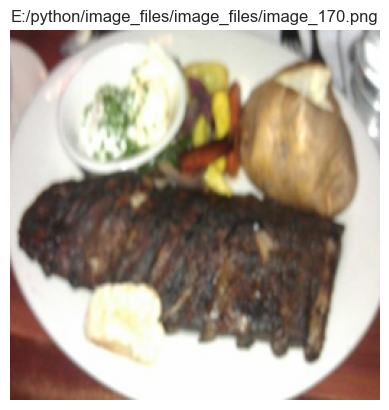

In [53]:
for path in blur_imgs[:5]:
    img = Image.open(path)
    plt.imshow(img)
    plt.title(path)
    plt.axis("off")
    plt.show()

In [56]:
img = cv2.imread("E:/python/image_files/image_files/image_170.png")


# Create a sharpening kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

sharpened = cv2.filter2D(img, -1, kernel)
cv2.imwrite("image_170_sharp.png", sharpened)

True

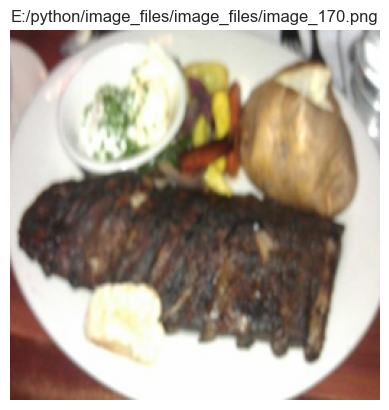

In [57]:
plt.imshow(Image.open("E:/python/image_files/image_files/image_170.png"))
plt.title("E:/python/image_files/image_files/image_170.png")
plt.axis("off")
plt.show()